In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Exemplo de como carregar o conjunto de dados Breast Cancer Wisconsin da biblioteca sklearn
dados = load_breast_cancer()
X = pd.DataFrame(dados.data, columns=dados.feature_names)
y = pd.Series(dados.target, name="diagnosis") # 0 = Maligno, 1 = Benigno
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=10000)  # Ajuste de iteração para garantir convergência
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Resultados do modelo de Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Resultados do modelo de Regressão Logística:
Acurácia: 0.956140350877193
Matriz de Confusão:
[[39  4]
 [ 1 70]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



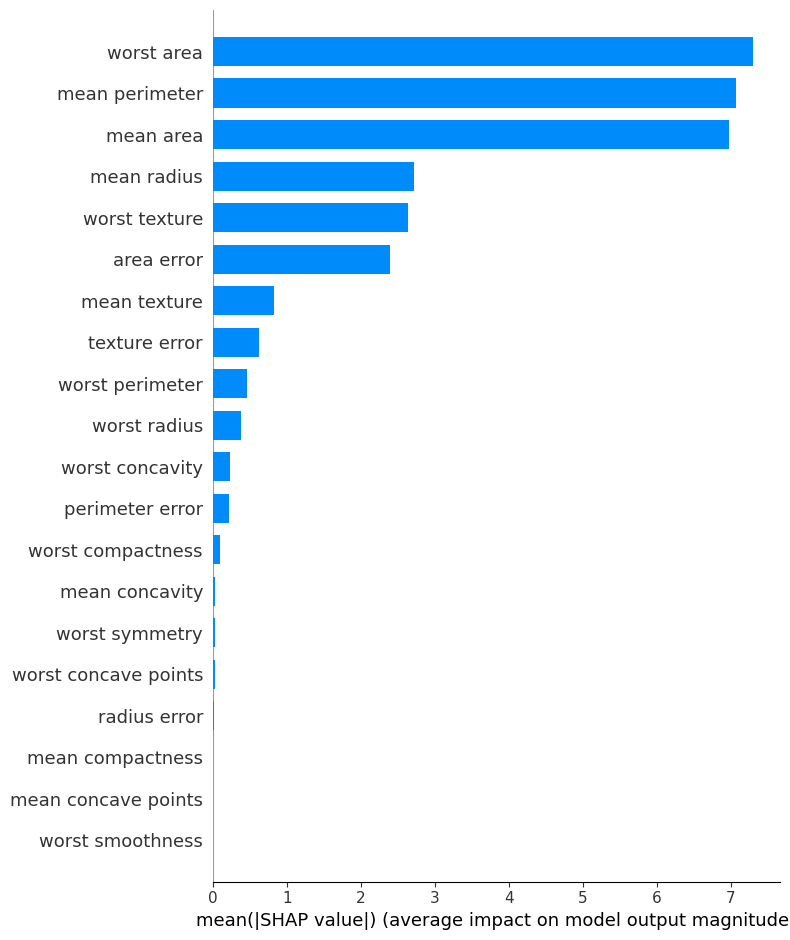


Interpretação para o exemplo 1:


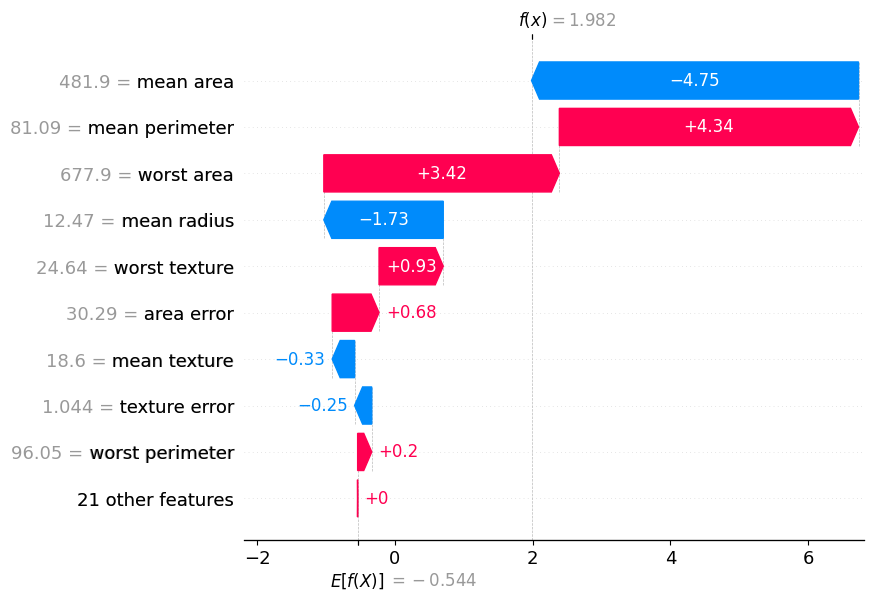


Interpretação para o exemplo 2:


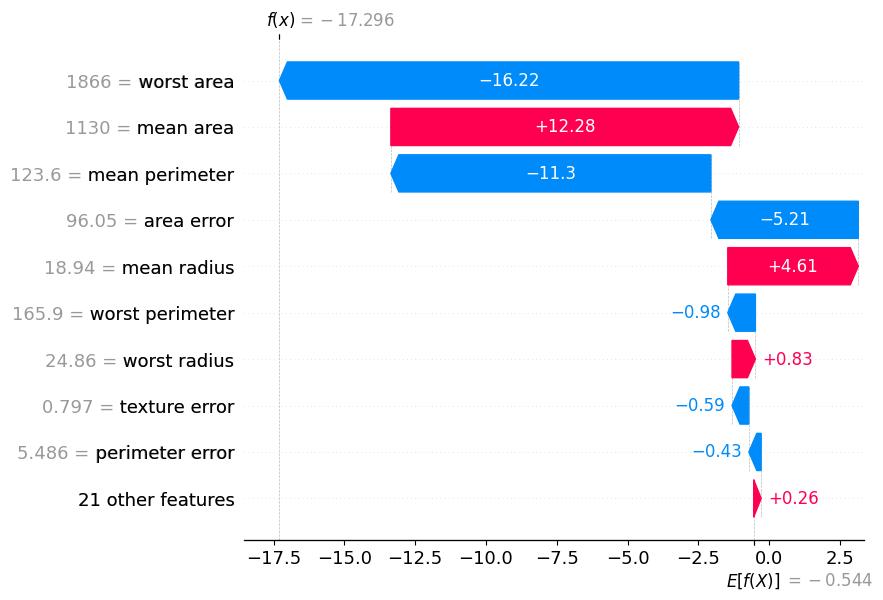


Interpretação para o exemplo 3:


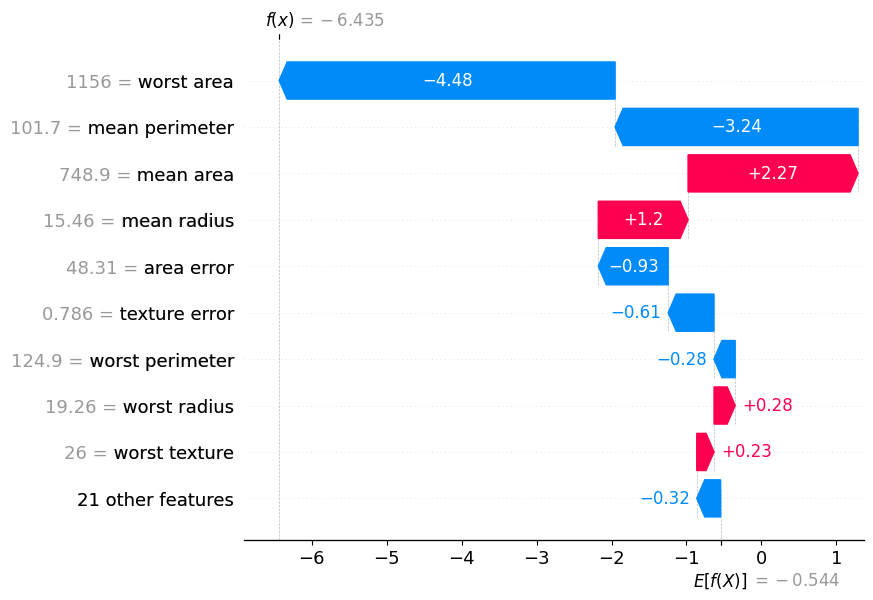

In [ ]:
# Inicializando o Explainer SHAP para o modelo de Regressão Logística
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
# Plot SHAP summary para entender a importância geral das variáveis
shap.summary_plot(shap_values, X_test, plot_type="bar")
# Análise detalhada para três exemplos de pacientes
for i in range(3):
  print(f"\nInterpretação para o exemplo {i+1}:")
  shap.initjs()
  shap.waterfall_plot(shap_values[i])


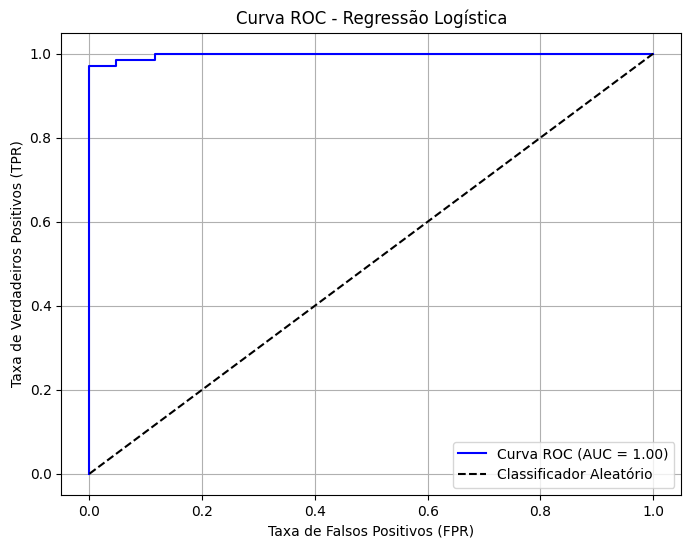

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

# Obter as probabilidades de predição para a classe 1
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1 (Benigno)

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()